In [ ]:
#REG

In [1]:
import pandas as pd

In [2]:
df1=pd.read_excel('w.xlsx')

In [24]:
# split to X and y
X=df1[['quantity_tons','status','item_type','application','thickness','width','country','customer','product_ref']]
y=df1['selling_price']

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item_type']])
X_ohe = ohe.fit_transform(X[['item_type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
X_be = ohe2.fit_transform(X[['status']]).toarray()
# independent features after encoding
X = np.concatenate((X[['quantity_tons', 'application', 'thickness', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [5]:
#Random Forest Regression

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



# Create a Random Forest Regressor with specified hyperparameters
rf_regressor = RandomForestRegressor(random_state=42)
# Fit the model on the training data
rf_regressor.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:',mse)
print('R-squared (R2) Score:',r2)

Mean Squared Error: 0.02009747246106165
R-squared (R2) Score: 0.9426490963501495


In [6]:
#Random Forest Regression

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



# Create a Random Forest Regressor with specified hyperparameters
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit the model on the training data
rf_regressor.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:',mse)
print('R-squared (R2) Score:',r2)

Mean Squared Error: 0.02009747246106165
R-squared (R2) Score: 0.9426490963501495


In [26]:
#Random Forest Regression

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



# Create a Random Forest Regressor with specified hyperparameters
rf_regressor = RandomForestRegressor(max_depth= 20,min_samples_split=5,min_samples_leaf=1,n_estimators=100, random_state=42)
# Fit the model on the training data
rf_regressor.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:',mse)
print('R-squared (R2) Score:',r2)

Mean Squared Error: 0.019129072261714543
R-squared (R2) Score: 0.9454125595983194


In [8]:
#Random Forest Regression

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



# Create a Random Forest Regressor with specified hyperparameters
rf_regressor = RandomForestRegressor(max_depth= 20,min_samples_split=5,min_samples_leaf=1,random_state=42)
# Fit the model on the training data
rf_regressor.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:',mse)
print('R-squared (R2) Score:',r2)

Mean Squared Error: 0.019129072261714543
R-squared (R2) Score: 0.9454125595983194


In [ ]:
#PRED

In [27]:
# ['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = rf_regressor.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [719.10432646]


c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [28]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(rf_regressor, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

In [ ]:
#CLASS

In [9]:
import pandas as pd

In [ ]:
df1=pd.read_excel('w.xlsx')

In [29]:
filtered_df = df1[df1['status'].isin(['Won', 'Lost'])]


In [30]:
Y = filtered_df['status']
X= filtered_df[['quantity_tons','selling_price','item_type','application','thickness','width','country','customer','product_ref']]

In [31]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer



# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item_type']])
X_ohe = ohe.fit_transform(X[['item_type']]).toarray()
be = LabelBinarizer()
be.fit(Y) 
y = be.fit_transform(Y)
# independent features after encoding
X = np.concatenate((X[['quantity_tons', 'selling_price','application', 'thickness', 'width','country','customer','product_ref']].values, X_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Initialize ROSE
rose = RandomOverSampler(sampling_strategy='auto', random_state=42)  # You can adjust the sampling_strategy if needed

# Fit and apply ROSE to your data
X_resampled, y_resampled = rose.fit_resample(X, y)

# Check the class distribution after applying ROSE
print("Class distribution after ROSE:", Counter(y_resampled))


Class distribution after ROSE: Counter({1: 116004, 0: 116004})


In [18]:
# Random Forest

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


# Initialize the Random Forest model
random_forest = RandomForestClassifier(random_state=42)  # You can adjust the number of estimators (trees)
# Fit the model on the training data
random_forest.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = random_forest.predict(X_test)
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, average='weighted')
recall_test = recall_score(y_test, y_pred, average='weighted')
f1_test = f1_score(y_test, y_pred, average='weighted')
print('Accuracy:',accuracy)
print("Testing Precision:", precision_test)
print("Testing Recall:", recall_test)
print("Testing F1 Score:", f1_test)

c:\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9336634650536741
Testing Precision: 0.9327917957717138
Testing Recall: 0.9336634650536741
Testing F1 Score: 0.9330581409905429


In [15]:
# Random Forest

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


# Initialize the Random Forest model
random_forest = RandomForestClassifier(n_estimators=300, random_state=42)  # You can adjust the number of estimators (trees)
# Fit the model on the training data
random_forest.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = random_forest.predict(X_test)
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, average='weighted')
recall_test = recall_score(y_test, y_pred, average='weighted')
f1_test = f1_score(y_test, y_pred, average='weighted')
print('Accuracy:',accuracy)
print("Testing Precision:", precision_test)
print("Testing Recall:", recall_test)
print("Testing F1 Score:", f1_test)

c:\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9342616903187211
Testing Precision: 0.9333275651494134
Testing Recall: 0.9342616903187211
Testing F1 Score: 0.933571248419311


In [33]:
# Random Forest

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


# Initialize the Random Forest model
random_forest = RandomForestClassifier(max_depth= 39,min_samples_split=2,min_samples_leaf=1,n_estimators=300, random_state=42)  # You can adjust the number of estimators (trees)
# Fit the model on the training data
random_forest.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = random_forest.predict(X_test)
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, average='weighted')
recall_test = recall_score(y_test, y_pred, average='weighted')
f1_test = f1_score(y_test, y_pred, average='weighted')
print('Accuracy:',accuracy)
print("Testing Precision:", precision_test)
print("Testing Recall:", recall_test)
print("Testing F1 Score:", f1_test)

c:\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9346937418990329
Testing Precision: 0.9337574718667487
Testing Recall: 0.9346937418990329
Testing F1 Score: 0.9339915346593255


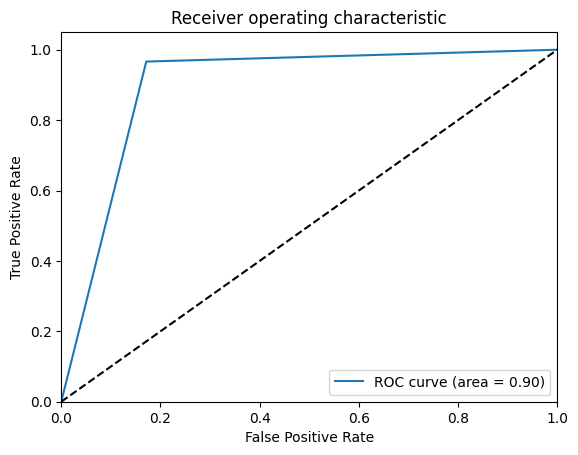

In [20]:
# ROC curve and AUC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#PRED

In [22]:
filtered_df.head()

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,3.991779,30156308.0,28,Won,W,10,0.693147,1500.0,DEQ1 S460MC,1670798778,2021-07-01,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,6.643822,30202938.0,25,Won,W,41,-0.223144,1210.0,104991,1668701718,2021-04-01,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,5.956169,30153963.0,30,Won,WI,28,-0.967584,952.0,S0380700,628377,2021-01-01,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,5.310301,30349574.0,32,Won,S,59,0.832909,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,6.666354,30211560.0,28,Won,W,10,1.386294,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,6.357842


In [34]:
# Predict the status for a new sample
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe

new_sample = np.array([[np.log(700), np.log(956), 10, np.log(2),1500,28,30202938,1670798778,'W']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = random_forest.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [35]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(random_forest, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)